# Forecast the CocaCola prices data set
#dataset:coc.xlsx

In [1]:
#Importing necessaries lib.& load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
coc = pd.read_excel("C:\\Users\\Raja\\Downloads\\assignments\\forecasting\\coc.xlsx")

In [2]:
#Showing 5 top most records
coc.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
# Shape of coc dataframe
coc.shape

(42, 2)

In [4]:
# Show the type of dataframe
type(coc)

pandas.core.frame.DataFrame

In [5]:
#Loading data with replacing index cols with Quarter cols
coc = pd.read_excel("C:\\Users\\Raja\\Downloads\\assignments\\forecasting\\coc.xlsx", index_col=[0], parse_dates=True,squeeze=True)

In [6]:
#Type of new data frame i.e make dataframe->dataseries
type(coc)

pandas.core.series.Series

In [7]:
#Showing general statistical description
coc.describe()

count      42.000000
mean     2994.353308
std       977.930896
min      1547.818996
25%      2159.714247
50%      2782.376999
75%      3609.250000
max      5253.000000
Name: Sales, dtype: float64

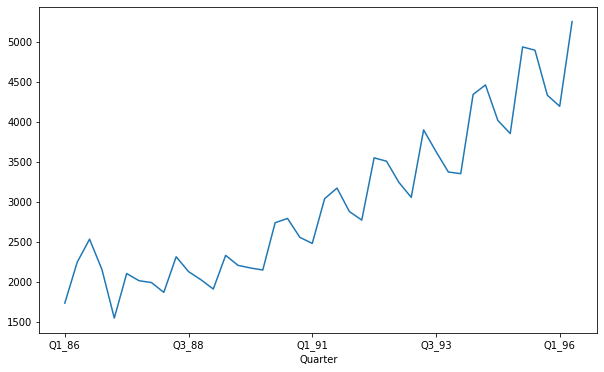

In [8]:
#TimeSeries plot
coc.plot()

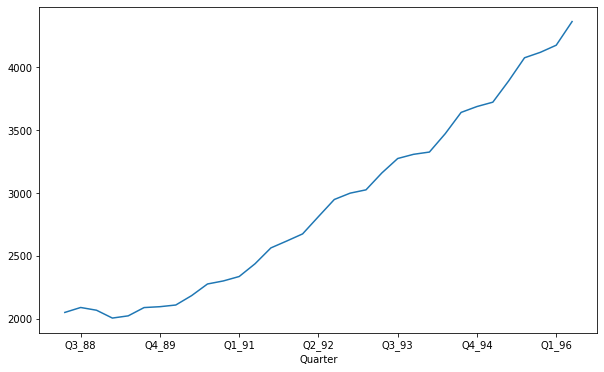

In [9]:
#Creating Moving average #1st analysis of timeseries
coc_MA=coc.rolling(window=10).mean()
coc_MA.plot()

In [10]:
#Naive or base model is created
coc_base=pd.concat([coc, coc.shift(1)],axis=1)
coc_base.head()

,Sales,Sales
Quarter,,
Q1_86,1734.827000,NaN
Q2_86,2244.960999,1734.827000
Q3_86,2533.804993,2244.960999
Q4_86,2154.962997,2533.804993
Q1_87,1547.818996,2154.962997


In [11]:
#Renaiming Sales cols with actual & forecast sales
coc_base.columns=['actual_sales',  'forecast_sales']

In [12]:
#Top 5 most records
coc_base.head()

,actual_sales,forecast_sales
Quarter,,
Q1_86,1734.827000,NaN
Q2_86,2244.960999,1734.827000
Q3_86,2533.804993,2244.960999
Q4_86,2154.962997,2533.804993
Q1_87,1547.818996,2154.962997


In [13]:
#Drop NaN value records
coc_base.dropna(inplace=True)

In [14]:
#Show records of data
coc_base.head()

,actual_sales,forecast_sales
Quarter,,
Q2_86,2244.960999,1734.827000
Q3_86,2533.804993,2244.960999
Q4_86,2154.962997,2533.804993
Q1_87,1547.818996,2154.962997
Q2_87,2104.411995,1547.818996


In [15]:
#Import sklearn libraies & numpy
from sklearn.metrics import mean_squared_error
import numpy as np

In [16]:
#Finding MSE 
coc_error=mean_squared_error(coc_base.actual_sales,coc_base.forecast_sales)
coc_error

192405.72009698782

In [17]:
#Finding RMSE
np.sqrt(coc_error)

438.64076429008264

In [18]:
#Import ACF, PACF timeseriasplots lib.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

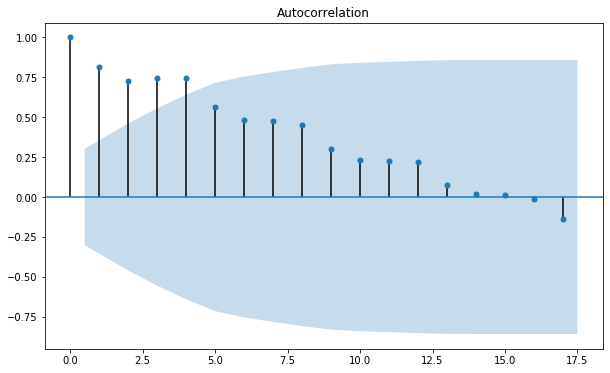

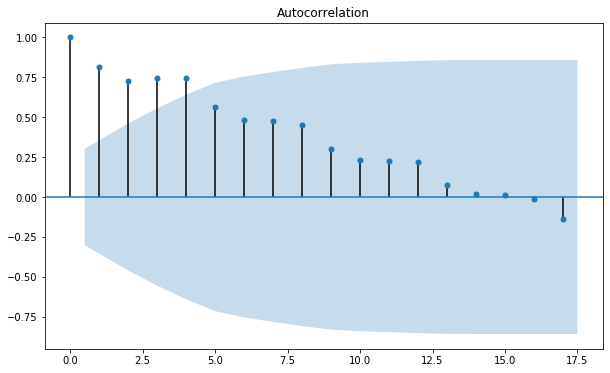

In [19]:
#ACF plot of data
plot_acf(coc)

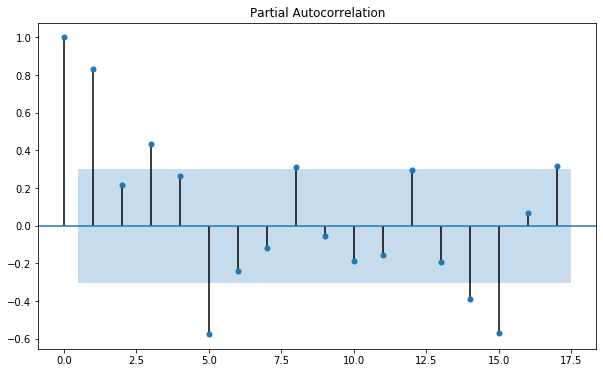

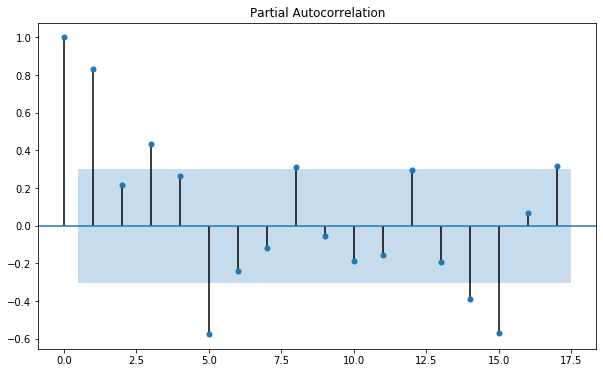

In [20]:
#Plot PACF (q->4, p->2, d->0-2)
plot_pacf(coc)

In [21]:
#Importing ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [22]:
#Dividing data into train & test with below slicing
coc_train=coc[0:32]
coc_test=coc[32:42]

In [23]:
#Restrict showing warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Trining ARIMA model with given order p,d,q
coc_model=ARIMA(coc_train, order=(4,2,0)) #2,1,2

In [25]:
#Fitting model
coc_model_fit=coc_model.fit()

In [26]:
#The Akaike Information Critera (AIC)
coc_model_fit.aic

433.27936649467944

In [27]:
#Forecast data
coc_forecast=coc_model_fit.forecast(steps=10)[0]
coc_forecast

array([3277.56549125, 4054.06514732, 3729.78005589, 3566.79199814,
       3541.77043149, 4252.00868114, 3893.02819264, 3821.36101512,
       3848.47588618, 4495.42343477])

#### 10 Forecasted values of quarters

In [28]:
#RMSE error
np.sqrt(mean_squared_error(coc_test,coc_forecast))

578.807340470788

In [29]:
#Testing p,d,q values on this range for Auto finding corect or best order
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [30]:
#Finding MSE using ARIMA model with loop functions
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test=coc[0:32],coc[32:42]
            predictions=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('ARIMA%s MSE=%.2f'%(order,error))
                except:
                    continue

ARIMA(0, 0, 0) MSE=3514557.80
ARIMA(0, 0, 1) MSE=2338680.28
ARIMA(0, 0, 2) MSE=2630172.56
ARIMA(0, 0, 3) MSE=2606581.59
ARIMA(0, 0, 4) MSE=1839210.36
ARIMA(0, 1, 0) MSE=1163960.54
ARIMA(0, 1, 1) MSE=861814.27
ARIMA(0, 1, 2) MSE=1064926.99
ARIMA(0, 1, 3) MSE=1921094.39
ARIMA(0, 1, 4) MSE=1250794.26
ARIMA(0, 2, 0) MSE=1902976.23
ARIMA(0, 2, 1) MSE=1149758.41
ARIMA(0, 2, 2) MSE=727156.17
ARIMA(0, 2, 3) MSE=853807.41
ARIMA(1, 0, 0) MSE=1543516.83
ARIMA(1, 0, 1) MSE=1158184.35
ARIMA(1, 0, 2) MSE=131343296.71
ARIMA(1, 0, 3) MSE=862006.57
ARIMA(1, 0, 4) MSE=1420995.53
ARIMA(1, 1, 0) MSE=1058649.20
ARIMA(1, 1, 1) MSE=947752.46
ARIMA(1, 1, 2) MSE=953990.12
ARIMA(1, 1, 3) MSE=763618.83
ARIMA(1, 1, 4) MSE=1190955.08
ARIMA(1, 2, 0) MSE=1934744.42
ARIMA(1, 2, 1) MSE=1033263.95
ARIMA(1, 2, 2) MSE=501608.52
ARIMA(2, 0, 0) MSE=1460406.63
ARIMA(2, 0, 1) MSE=1125291.53
ARIMA(2, 0, 2) MSE=1219539.94
ARIMA(2, 0, 3) MSE=968942.38
ARIMA(2, 0, 4) MSE=1387550.15
ARIMA(2, 1, 0) MSE=689944.81
ARIMA(2, 1, 1) MSE

#Various methods of Data Transformation to achieve Stationarity has not applied as: log10 , loge , cube, cube root, exponential decay
#Not checked seperately AR & MA Model

#### I can not prefer model ARIMA-->ARIMA(1, 2, 2) MSE=501608.52, RMSE=708.24-->This is high error than base model